#Unstructured Data Analytics: Group Assignment #3


#Group Members:
#1.Rithu Anand Krishnan
#2.Manvi Mahajan
#3.Paul Wen (Yilin Wen)
#4.Alex Yu
#5.Judy Chen (Yu-Ting Chen)

#Building a Crowdsourced Recommender System
High level description: The objective of this group assignment is to create the building blocks of a 
crowdsourced recommender system. It should accept user inputs in the form of desired attributes of a 
product and come up with 3 recommendations. 
Obtain reviews of craft beers from beeradvocate.com. I would suggest using the following link, which 
shows the top 250 beers sorted by ratings: 
https://www.beeradvocate.com/beer/top-rated/
The nice feature of the above link is that it is a single-page listing of 250 top-rated beers (avoids the 
pagination feature, which you need in cases where listings go on for many pages). The output file should 
have 3 columns: product_name, product_review, and user_rating. 

#Task A. 
Extract about 2-3k reviews. 

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
from itertools import chain

In [ ]:
#scrapped data is stored in beer_reviews.csv file
beers = pd.read_csv("beer_reviews.csv")

In [ ]:
beers

,web-scraper-order,web-scraper-start-url,home_page,home_page-href,reviews
0,1666819284-1,https://www.beeradvocate.com/beer/top-rated/,Coolship Red,https://www.beeradvocate.com/beer/profile/4/58...,"Bottled January 19, 2017. Appearance is a rust..."
1,1666819284-2,https://www.beeradvocate.com/beer/top-rated/,Coolship Red,https://www.beeradvocate.com/beer/profile/4/58...,"This is likely spot-on for style, but a bit to..."
2,1666819284-3,https://www.beeradvocate.com/beer/top-rated/,Coolship Red,https://www.beeradvocate.com/beer/profile/4/58...,"Thanks to Roy_Hobbs for this one, as part of t..."
3,1666819284-4,https://www.beeradvocate.com/beer/top-rated/,Coolship Red,https://www.beeradvocate.com/beer/profile/4/58...,375ml bottle from 2012.\n\n\n\nPours dark copp...
4,1666819284-5,https://www.beeradvocate.com/beer/top-rated/,Coolship Red,https://www.beeradvocate.com/beer/profile/4/58...,Draft at the brewery. \n\n\n\nLovely clear pin...
...,...,...,...,...,...
2257,1666819826-2258,https://www.beeradvocate.com/beer/top-rated/,Kentucky Brunch Brand Stout,https://www.beeradvocate.com/beer/profile/2322...,Draft pour at TG. \n\n\n\nPitch black with no ...
2258,1666819826-2259,https://www.beeradvocate.com/beer/top-rated/,Kentucky Brunch Brand Stout,https://www.beeradvocate.com/beer/profile/2322...,2020 vintage drank 10/22/21\n\nIncredible smel...
2259,1666819826-2260,https://www.beeradvocate.com/beer/top-rated/,Kentucky Brunch Brand Stout,https://www.beeradvocate.com/beer/profile/2322...,2020 vintage acquired during the pandemic. It ...
2260,1666819826-2261,https://www.beeradvocate.com/beer/top-rated/,Kentucky Brunch Brand Stout,https://www.beeradvocate.com/beer/profile/2322...,There isn’t a better stout put there! See my U...


## Task B
Assume that a customer, who will be using this recommender system, has specified 3 attributes 
in a product. E.g., one website describes multiple attributes of beer:
https://www.dummies.com/food-drink/drinks/beer/beer-for-dummies-cheat-sheet/
 Aggressive (Boldly assertive aroma and/or taste) 
 Balanced: Malt and hops in similar proportions; equal representation of malt sweetness and 
hop bitterness in the flavor — especially at the finish
 Complex: Multidimensional; many flavors and sensations on the palate
 Crisp: Highly carbonated; effervescent
 Fruity: Flavors reminiscent of various fruits or Hoppy: Herbal, earthy, spicy, or citric aromas and 
flavors of hops or Malty: Grainy, caramel-like; can be sweet or dry
 Robust: Rich and full-bodied
Use the above attributes as examples only, for a word frequency analysis of beer reviews is a better way 
to find important attributes in the actual data. 

In [ ]:
beers["new_col"] = beers['reviews'].str.lower().str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_list = stopwords.words('english')

#Function to get the word tokens
def get_tokens(entry):
    #Use nltk to get word tokens.
    tokens = word_tokenize(entry)
    
    #Tokenize the word here. Returns the word if the word is a string. .isalpha() is a method that does this.
    token_words = [w for w in tokens if w.isalpha()]
    
    return token_words

#Function to remove the stopwords
def remove_stop_words(entry):
    
    no_stopwords = [w for w in entry if not w in stopwords_list]
    return (no_stopwords)


#Function to delist the entries and join the words together in a string.
def rejoin_words(entry):
    
    joined_words = ( " ".join(entry))
    return joined_words

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Apply functions
#Word tokenization first
beers['words'] = beers['new_col'].apply(get_tokens)

#Remove stopwords next
beers['words'] = beers['words'].apply(remove_stop_words)

#Rejoin list to a sentence.
beers['processed_review'] = beers['words'].apply(rejoin_words)

#Iterate through the sentences.

#Use the Counter function from the collections module to count words.
#Use chain from itertools module to iterate.
tally = Counter(chain.from_iterable(map(str.split, beers['processed_review'].tolist()))) 

#Create a series for the word counts.
series = pd.Series(tally).sort_values(ascending=False)

#Create a term frequency dataframe for the words and their frequency
term_freq = series.reset_index()
term_freq.columns = ['words','freq']


term_freq.to_csv('beers_term_frequency.csv')

In [ ]:
term_freq.head(15)

,words,freq
0,beer,1601
1,head,1238
2,taste,1093
3,chocolate,904
4,dark,854
5,like,733
6,notes,733
7,sweet,698
8,bourbon,691
9,good,690


In [ ]:
beers

,web-scraper-order,web-scraper-start-url,home_page,home_page-href,reviews,new_col,words,processed_review
0,1666819284-1,https://www.beeradvocate.com/beer/top-rated/,Coolship Red,https://www.beeradvocate.com/beer/profile/4/58...,"Bottled January 19, 2017. Appearance is a rust...",bottled january 19 2017 appearance is a rusty ...,"[bottled, january, appearance, rusty, amber, s...",bottled january appearance rusty amber shortli...
1,1666819284-2,https://www.beeradvocate.com/beer/top-rated/,Coolship Red,https://www.beeradvocate.com/beer/profile/4/58...,"This is likely spot-on for style, but a bit to...",this is likely spoton for style but a bit too ...,"[likely, spoton, style, bit, much, pucker, pou...",likely spoton style bit much pucker pours beau...
2,1666819284-3,https://www.beeradvocate.com/beer/top-rated/,Coolship Red,https://www.beeradvocate.com/beer/profile/4/58...,"Thanks to Roy_Hobbs for this one, as part of t...",thanks to roy_hobbs for this one as part of th...,"[thanks, one, part, beatings, delivered, nbs, ...",thanks one part beatings delivered nbs bif cor...
3,1666819284-4,https://www.beeradvocate.com/beer/top-rated/,Coolship Red,https://www.beeradvocate.com/beer/profile/4/58...,375ml bottle from 2012.\n\n\n\nPours dark copp...,375ml bottle from 2012\n\n\n\npours dark coppe...,"[bottle, pours, dark, copper, burgundy, tinge,...",bottle pours dark copper burgundy tinge quickl...
4,1666819284-5,https://www.beeradvocate.com/beer/top-rated/,Coolship Red,https://www.beeradvocate.com/beer/profile/4/58...,Draft at the brewery. \n\n\n\nLovely clear pin...,draft at the brewery \n\n\n\nlovely clear pink...,"[draft, brewery, lovely, clear, pinkish, red, ...",draft brewery lovely clear pinkish red smell t...
...,...,...,...,...,...,...,...,...
2257,1666819826-2258,https://www.beeradvocate.com/beer/top-rated/,Kentucky Brunch Brand Stout,https://www.beeradvocate.com/beer/profile/2322...,Draft pour at TG. \n\n\n\nPitch black with no ...,draft pour at tg \n\n\n\npitch black with no h...,"[draft, pour, tg, pitch, black, head, thick, n...",draft pour tg pitch black head thick nose heav...
2258,1666819826-2259,https://www.beeradvocate.com/beer/top-rated/,Kentucky Brunch Brand Stout,https://www.beeradvocate.com/beer/profile/2322...,2020 vintage drank 10/22/21\n\nIncredible smel...,2020 vintage drank 102221\n\nincredible smell ...,"[vintage, drank, incredible, smell, soon, bott...",vintage drank incredible smell soon bottle ope...
2259,1666819826-2260,https://www.beeradvocate.com/beer/top-rated/,Kentucky Brunch Brand Stout,https://www.beeradvocate.com/beer/profile/2322...,2020 vintage acquired during the pandemic. It ...,2020 vintage acquired during the pandemic it w...,"[vintage, acquired, pandemic, everything, id, ...",vintage acquired pandemic everything id hoped ...
2260,1666819826-2261,https://www.beeradvocate.com/beer/top-rated/,Kentucky Brunch Brand Stout,https://www.beeradvocate.com/beer/profile/2322...,There isn’t a better stout put there! See my U...,there isnt a better stout put there see my unt...,"[isnt, better, stout, put, see, untappd, c, b,...",isnt better stout put see untappd c b full rev...


In [ ]:
# these are three customer provided attritubes
attributes = ['sweet','vanilla','light']

## Task C
Task C. Perform a similarity analysis using cosine similarity (without word embeddings) with the 3 
attributes specified by the customer and the reviews. 
The similarity script should accept as input a file with the product attributes, and calculate similarity 
scores (between 0 and 1) between these attributes and each review. That is, the output file should have 
3 columns – product_name (for each product, the product_name will repeat as many times as there are 
reviews of the product), product_review and similarity_score. 

In [ ]:
!python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 16 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import en_core_web_lg

In [ ]:
nlp = spacy.load('en_core_web_lg')

Here we are using two different methods to calculate similarity.
1. Using spacy with word vectors
2. Using cosine similarity on bag of words

In [ ]:
# Spacy approach
attributes_nlp = nlp('sweet vanilla light')
def get_spacy_similarity(review_words):
    text_review = ' '.join(review_words)
    review_nlp = nlp(text_review)
    return review_nlp.similarity(attributes_nlp)

beers['spacy similarity'] =  beers['processed_review'].apply(get_spacy_similarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  


In [ ]:
spacy_similar_beers = pd.DataFrame()
spacy_similar_beers[['beer_name','reviews','spacy similarity']] = beers[['home_page','processed_review','spacy similarity']]
spacy_similar_beers.reset_index(drop=True).head(5)

,beer_name,reviews,spacy similarity
0,Coolship Red,bottled january appearance rusty amber shortli...,0.170718
1,Coolship Red,likely spoton style bit much pucker pours beau...,0.163244
2,Coolship Red,thanks one part beatings delivered nbs bif cor...,0.178708
3,Coolship Red,bottle pours dark copper burgundy tinge quickl...,0.176106
4,Coolship Red,draft brewery lovely clear pinkish red smell t...,0.166479


In [ ]:
spacy_similar_beers.to_csv('beer_spacy_similarity.csv')

In [ ]:
# Take average of spacy similarity for each beer 
df1 = spacy_similar_beers.groupby('beer_name')['spacy similarity'].mean().reset_index().sort_values(by='spacy similarity',ascending = False)
df1.head(10)

,beer_name,spacy similarity
98,Foggy Window,0.205121
151,Label Us Notorious - Calvados BA Big Poppa,0.198643
218,The Adjunct Trail - Bourbon Barrel-Aged,0.194804
121,Henna: Barrel-Aged Double Rainbow,0.192338
150,La Fosse,0.190309
13,Anabasis,0.189620
18,Art,0.189433
193,Saison Du Fermier,0.188155
234,Vanilla Bean Assassin,0.185001
117,Headroom,0.184900


In [ ]:
# Cosine similarity 
count_vectorizer = CountVectorizer()
attribute = 'sweet vanilla light'
#beer_list = beers['home_page'].unique()

def create_dataframe(matrix, tokens):
    reviews = [f'review_{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=reviews, columns=tokens)
    return(df)

def get_similarity(review_words):
  vector_matrix = count_vectorizer.fit_transform([review_words,attribute])
  tokens = count_vectorizer.get_feature_names()
  vector_matrix.toarray()
  create_dataframe(vector_matrix.toarray(),tokens)
  cosine_similarity_matrix = cosine_similarity(vector_matrix)
  return cosine_similarity_matrix[0][1]

In [ ]:
beers['similarity'] =  beers['processed_review'].apply(get_similarity)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Take average of spacy similarity for each beer 
cosine_similar_beers = pd.DataFrame()
cosine_similar_beers[['beer_name','reviews','cosine similarity']] = beers[['home_page','processed_review','similarity']].sort_values(by='similarity',ascending = False)
cosine_similar_beers.reset_index(drop=True).head(5)

,beer_name,reviews,cosine similarity
0,Stickee Monkee,sweet sweet,0.577350
1,Fundamental Observation,pours pitch black completely opaque shiny appe...,0.491127
2,"Somewhere, Something Incredible Is Waiting To ...",pours dark appropriately large foamy mocha hea...,0.450835
3,§ucaba,deep brown light black color minimal light pen...,0.416667
4,CBS (Canadian Breakfast Stout),vintage black light brown foam smell coffee to...,0.414781


In [ ]:
cosine_similar_beers.to_csv('beer_cosine_similarity.csv')

In [ ]:
df1 = cosine_similar_beers.groupby('beer_name')['cosine similarity'].mean().reset_index().sort_values(by='cosine similarity',ascending = False)
df1.drop([203], axis=0, inplace=True)
df1.head(10)

,beer_name,cosine similarity
107,Fundamental Observation,0.232032
234,Vanilla Bean Assassin,0.231314
106,Fundamental Forces,0.193131
165,Modem Tones - Bourbon Barrel-Aged - Vanilla,0.164520
188,Rare Scooop,0.153563
210,Stickee Monkee,0.153551
34,Black Tuesday - Reserve,0.150888
171,No Rules,0.146605
51,Chocolate Rain,0.144670
230,Truth - Vanilla Bean,0.144153


## Task D. 
For every review, perform a sentiment analysis (using VADER).

In [ ]:
!pip install VADER
!pip install nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 4.7 MB/s 
  Created wheel for sonopy: filename=sonopy-0.1.2-py3-none-any.whl size=2879 sha256=158d28ae754bf5f442c86e2ecc68903197995a7404d5c058ab4c371e72f58c8e
  Stored in directory: /root/.cache/pip/wheels/27/17/02/d430779ebe878618c57368f50b0a7d6f4c9efc957e762290a9
Successfully built sonopy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


#Answer

We are taking two approaches to find sentiment of the review.
1. Sentiment related the attributes specified and taking the average sentiment value for all the reviews under one beer.
2. Overall sentiment of the review by modifying the default values for few most freq words.

In [ ]:
# First approach
# Create a dataframe of original reviews
df_sentiment = beers[['home_page', 'reviews']]
# Create columns for attribute sentiment
df_sentiment['sweet_sentiment'] = 0
df_sentiment['vanilla_sentiment'] = 0
df_sentiment['light_sentiment'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
for i in range(len(df_sentiment)): 
    review = df_sentiment.loc[i,'reviews']
    # Create a list of sentences from the review and tokenize
    sentences = sent_tokenize(review)
    # Record scores
    sweet_score = []
    vanilla_score = []
    light_score = []

    # Compound sentiment scores
    for token in sentences:
        if 'sweet' in token.lower():
            sweet_score2 = sid.polarity_scores(token).get('compound')
            sweet_score.append(sweet_score2)

        if 'vanilla' in token.lower():
            vanilla_score2 = sid.polarity_scores(token).get('compound')
            vanilla_score.append(vanilla_score2)

        if 'light' in token.lower():
            light_score2 = sid.polarity_scores(token).get('compound')
            light_score.append(light_score2)

    # Store scores in arrays
    if len(sweet_score) == 0:  # No sentiment score if the word is not in the review
        df_sentiment.loc[i,'sweet_sentiment'] = None
    else:  # Average and store sentiment scores if the word is in the review
        df_sentiment.loc[i,'sweet_sentiment'] = np.mean(np.array(sweet_score))

    if len(vanilla_score) == 0:
        df_sentiment.loc[i,'vanilla_sentiment'] = None
    else:
        df_sentiment.loc[i,'vanilla_sentiment'] = np.mean(np.array(vanilla_score))

    if len(light_score) == 0:
        df_sentiment.loc[i,'light_sentiment'] = None
    else:
        df_sentiment.loc[i,'light_sentiment'] = np.mean(np.array(light_score))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# Group all the sentiments and average compound sentiment score
sentiment_average = df_sentiment.groupby(by=["home_page"])[["sweet_sentiment", "vanilla_sentiment", "light_sentiment"]].mean()
sentiment_average['avg_sentiment'] = (sentiment_average['sweet_sentiment'].fillna(0)+sentiment_average['vanilla_sentiment'].fillna(0)+sentiment_average['light_sentiment'].fillna(0))/3
sentiment_average = sentiment_average.sort_values(by='avg_sentiment', ascending = False).reset_index()

beer_updated2 = sentiment_average.rename(columns = {'home_page':'beer_name'})
beer_updated2.head()

,beer_name,sweet_sentiment,vanilla_sentiment,light_sentiment,avg_sentiment
0,Affogato,0.802000,0.444900,0.933700,0.726867
1,I Let My Tape Rock,0.906300,0.627367,0.558525,0.697397
2,Speedway Stout - Vietnamese Coffee,0.556500,0.458800,0.946800,0.654033
3,Double Stack,0.658507,0.709600,0.537600,0.635236
4,Triple Shot,0.681775,0.318200,0.883400,0.627792


In [ ]:
# Second approach
# Making sweet, light and vanilla values more positive because we want a beer with these attributes.
# Making dark and chocolate values more negative because they are the opposite of light and vanilla.
# Making few more most freq word's values as neutral which should not play a role in sentiment analysis.
new_words = {
    'sweet': 1.0,
    'light': 1.0,
    'vanilla': 1.0,
    'dark': -1.0,
    'chocolate': -0.50,
    'balanced': 0.0,
    'notes': 0.0,
    'taste': 0.0
}
sid.lexicon.update(new_words)

In [ ]:
beers['sentiment_scores'] = beers['processed_review'].apply(lambda text: sid.polarity_scores(text))
beers['compound']  = beers['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

def senti(df):
    if df['compound'] >= 0.05:
        val = "Positive"
    elif df['compound'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

beers['final_sentiment'] = beers.apply(senti, axis=1)

In [ ]:
beers_updated = pd.DataFrame()
beers_updated[['beer_name','reviews','cosine similarity', 'sentiment']] = beers[['home_page', 'processed_review', 'similarity', 'compound']]
beers_updated.head()

,beer_name,reviews,cosine similarity,sentiment
0,Coolship Red,bottled january appearance rusty amber shortli...,0.108148,0.9761
1,Coolship Red,likely spoton style bit much pucker pours beau...,0.000000,0.9403
2,Coolship Red,thanks one part beatings delivered nbs bif cor...,0.138013,0.9022
3,Coolship Red,bottle pours dark copper burgundy tinge quickl...,0.088045,0.5267
4,Coolship Red,draft brewery lovely clear pinkish red smell t...,0.000000,0.7425


## Task E. 
Create an evaluation score for each beer that uses both similarity and sentiment scores. E.g.,
total score = average of (similarity score + sentiment score) or a multiplicative model.

In [ ]:
#Sort and group both similarity score and sentiment score based on beer
df1 = beers_updated.groupby('beer_name')['cosine similarity'].mean().reset_index().sort_values(by='beer_name',ascending = False)
df2 = beers_updated.sort_values(by='beer_name', ascending = False)
df2 = df2.drop(['reviews','cosine similarity'], axis=1)

#Combine dataframes on beer name and average similarity and sentiment score to get evaluation score
dffinal = pd.merge(df1, df2, left_on='beer_name', right_on='beer_name')
dffinal['eval_score'] = (dffinal['cosine similarity']+dffinal['sentiment'])/2
dffinal.sort_values(by='eval_score', ascending = False)
dffinal.groupby('beer_name')['cosine similarity', 'sentiment','eval_score'].mean().reset_index().sort_values(by='eval_score',ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.


,beer_name,cosine similarity,sentiment,eval_score
234,Vanilla Bean Assassin,0.231314,0.917525,0.574420
106,Fundamental Forces,0.193131,0.885129,0.539130
107,Fundamental Observation,0.232032,0.804778,0.518405
14,Ann,0.065192,0.960000,0.512596
85,Double Shot,0.127475,0.895029,0.511252
...,...,...,...,...
58,Congress Street IPA,0.008332,0.320886,0.164609
133,JJJuiceee Machine,0.027840,0.272314,0.150077
218,The Adjunct Trail - Bourbon Barrel-Aged,0.000000,0.296000,0.148000
24,Barrel Aged Bomb!,0.061727,0.231000,0.146364


##Task F
How would your recommendation change if you use word vectors (e.g., the spaCy package with
medium sized pretrained word vectors) instead of the plain vanilla bag-of-words cosine similarity?

#Answer

Please note that the screenshots with sentiment values is posted as part of the next question. This section concentrates only on similarity values.

Two approaches are:- 
1) SpaCy
2) Cosine similarity,
it clearly showed that both the methods gave different beer recommendations. 
When performed the cosine similarity, the results are as following:

1. Fundamental observation
2. Vanilla Bean Assassin
3. Fundamental forces

These results are solely based on the idea where we calculate similarity based on the angle between the 2 vectors. In simple terms, it implements its mathematical form and does not perform any intelligent evaluations.

Now, when we performed SpaCy similarity using CountVectorizer, the results are as following:

1. Foggy Window
2. Label Us Notorious
3. The Adjunct Trail

When we run SpaCy, it already knows that certain words are going to mean the same and does its analysis accordingly. For example, in case of beer similarity, these beers which are listed under SpaCy recommendation, have been frequently described with the same qualtites (attributes) using synonymous words.


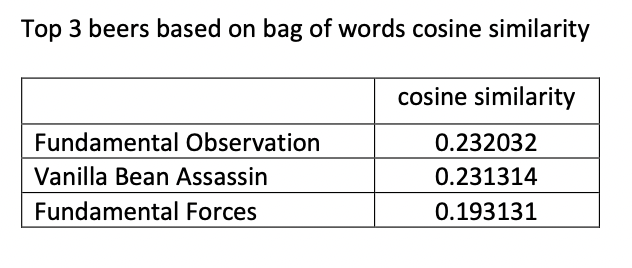

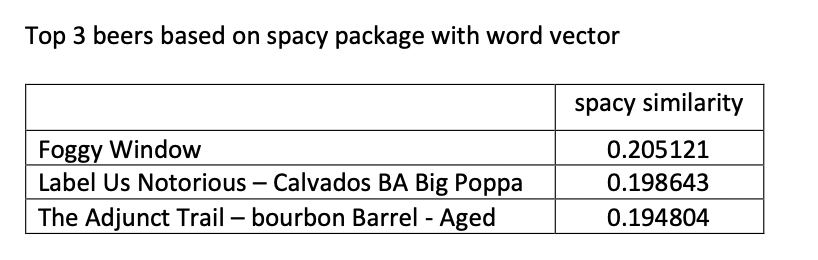

## Task G
How would your recommendations differ if you ignored the similarity and feature sentiment
scores and simply chose the 3 highest rated products from your entire dataset? Would these products
meet the requirements of the user looking for recommendations? Why or why not? Justify your answer
with analysis. Use the similarity and sentiment scores as well as overall ratings to answer this question.

In [ ]:
# dffinal.loc[dffinal['beer_name'] == 'Kentucky Brunch Brand Stout']
dfevalscore=dffinal.groupby('beer_name')['cosine similarity', 'sentiment','eval_score'].mean().reset_index().sort_values(by='eval_score',ascending = False)
dfevalscore.loc[dfevalscore['beer_name'] == 'Kentucky Brunch Brand Stout']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,beer_name,cosine similarity,sentiment,eval_score
145,Kentucky Brunch Brand Stout,0.045279,0.741675,0.393477


In [ ]:
dfevalscore.loc[dfevalscore['beer_name'] == 'Marshmallow Handjee']

,beer_name,cosine similarity,sentiment,eval_score
159,Marshmallow Handjee,0.091323,0.527573,0.309448


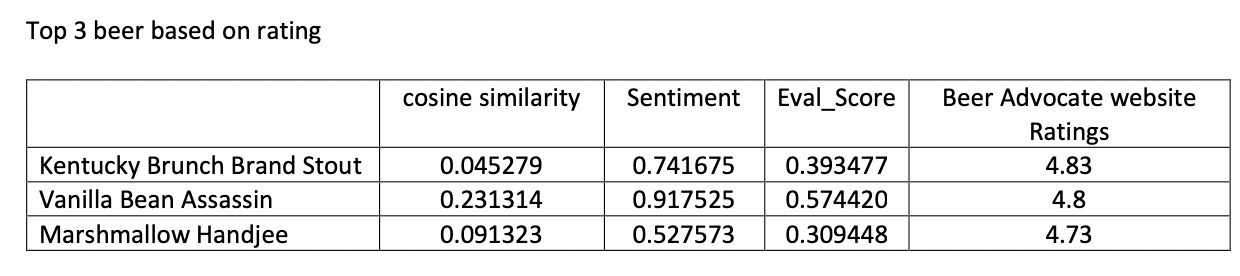

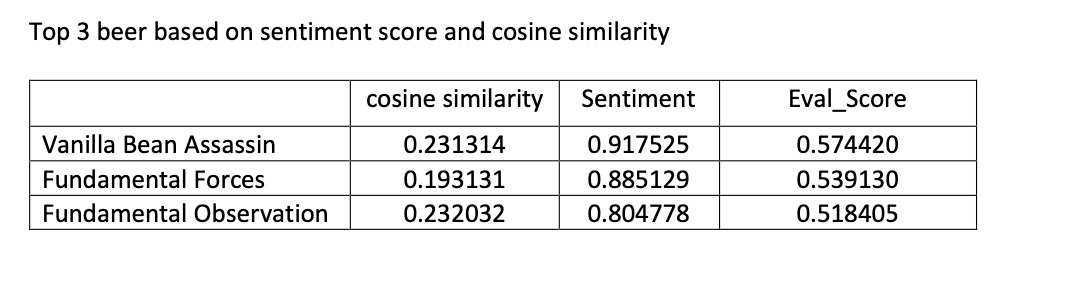

So based on website's highest rating, we would recommend Kentucky Brunch Brand Stout, Vanilla Bean Assassin, and Marshmallow Handjee with ratings of 4.83, 4.8, 4.73 respectively.

Meanwhile, according to the cosine similarity and sentiment analysis scores we have calculated as per our analysis, we would recommend Vanilla Bean Assassin, Fundamental Forces, and Fundamental Observation.

Both of the recommendations include Vanilla Bean Assassin so some requirements of the user would be satisfied with the requirements being sweet, vanilla, and light. The other two would not meet the requirements since the website's rating score does not perform analysis based on attributes and instead is based on user reviews which may favor other attributes instead of just sweet, vanilla, and light. This is reflected in both of Kentucky Brunch Brand Stout and Marshmallow Handjee's low Evaluation Scores of 0.393 and 0.309.

# Task H
Using the top four attributes of beer (from word frequency analysis), calculate the lifts between
these attributes and any 10 beers in your data. Choose one beer, and find the most similar beer (among
the remaining 9) using the lift values. Explain your method.

In [ ]:
#Lift of 10 beers and 4 attributes

#Beers
lift_row = ['§ucaba','Zombie Dust', 'Zenne Y Frontera', 'Yellow Bus', 'XTRA DUBL Benthic', 'Very Green','Westly', 'West Ashley', 'Very Hazy',	'Very HHHazyyy']
#Attributes
lift_column = ['sweet','vanilla','light','dark']

# Calculate Lift value
def calculate_lift(a, b, tokenized_posts):
    num_a = 0
    num_b = 0
    num_a_b = 0
    n = len(tokenized_posts)
    if a==b:
        return 1
    for i in tokenized_posts:
        if a in i:
            num_a += 1
        if b in i:
            num_b += 1
        if a in i and b in i:
            num_a_b += 1
    if num_a == 0:
        return (float(n)*num_a_b)/(num_b)
    elif num_b == 0:
        return (float(n)*num_a_b)/(num_a)
    else:
        return (float(n)*num_a_b)/(num_a*num_b)

# Calculate lift
beers['tokens'] = beers['home_page'] + ' ' + beers['processed_review']
lift_beer = pd.DataFrame(columns = ['Beer','Attribute','Lift of beer & attributes'])
i=0
for beer in lift_row:
    for attribute in lift_column:
        temp_lift='%.3f'%calculate_lift(str(beer), str(attribute), beers.tokens)
        lift_beer.loc[i]=[str(beer),str(attribute),temp_lift]
        i=i+1
        
df_lift = lift_beer.sort_values('Lift of beer & attributes',ascending = False).groupby('Beer').head(10)

# Print the lift matrix
lift_matrix2 = df_lift.pivot(index='Beer', columns='Attribute')
lift_matrix2

Lift of beer & attributes                      
Attribute                              dark  light  sweet vanilla
Beer                                                             
Very Green                            0.000  1.769  1.388   0.000
Very HHHazyyy                         0.000  0.315  0.000   0.665
Very Hazy                             0.365  1.651  1.322   0.000
West Ashley                           0.000  0.629  1.058   0.665
Westly                                0.000  0.354  0.397   0.000
XTRA DUBL Benthic                     1.879  0.809  0.906   1.710
Yellow Bus                            0.626  1.213  0.000   0.000
Zenne Y Frontera                      1.461  1.887  1.586   1.995
Zombie Dust                           0.209  0.944  0.906   0.000
§ucaba                                1.879  0.809  1.133   2.137

We chose Sucaba. It is most similar to XTRA DUBL Benthic because their lift values between dark and light are exactly the same values with both being 1.879 for dark and 0.809 for light. Both drinks are very dark and light on the stomach. Their values of for sweet and vanilla are also both very similar with their lift values for sweet being close to 1 with 0.906 and 1.133 and their lift values for vanilla being close to 2 with 1.71 and 2.137.